In [1]:
import numpy as np
import pandas as pd

## Loading the Data

In [2]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [4]:
data.shape

(100000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [6]:
data.isna().count()

CustomerID                    100000
Name                          100000
Age                           100000
Gender                        100000
Location                      100000
Subscription_Length_Months    100000
Monthly_Bill                  100000
Total_Usage_GB                100000
Churn                         100000
dtype: int64

In [7]:
data.isna()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [8]:
data.head(20)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
5,6.0,Customer_6,67.0,Male,New York,15.0,82.65,456.0,1.0
6,7.0,Customer_7,30.0,Female,Chicago,3.0,73.79,269.0,0.0
7,8.0,Customer_8,67.0,Female,Miami,1.0,97.70,396.0,1.0
8,9.0,Customer_9,20.0,Female,Miami,10.0,42.45,150.0,1.0
9,10.0,Customer_10,53.0,Female,Los Angeles,12.0,64.49,383.0,1.0


In [9]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

## EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([49784.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 50216.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

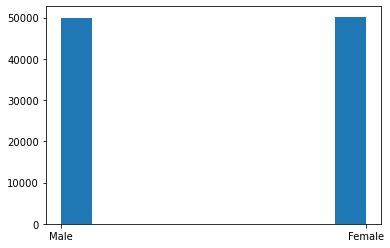

In [11]:
plt.hist(data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Churn'>

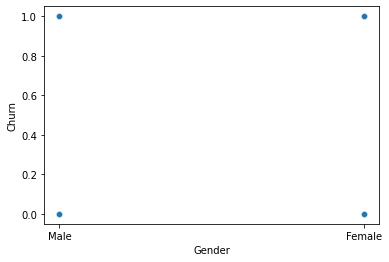

In [12]:
sns.scatterplot(x=data['Gender'], y=data['Churn'], data=data)

In [13]:
male_churn_0_count = data[(data['Gender'] == 'Male') & (data['Churn'] == 0)].shape[0]
male_churn_1_count = data[(data['Gender'] == 'Male') & (data['Churn'] == 1)].shape[0]
female_churn_0_count = data[(data['Gender'] == 'Female') & (data['Churn'] == 0)].shape[0]
female_churn_1_count = data[(data['Gender'] == 'Female') & (data['Churn'] == 1)].shape[0]

In [14]:

male_churn_1_count

24835

In [15]:
male_churn_0_count

24949

(array([12611.,  8269.,  8395., 12391.,  8355.,  8367., 12415.,  8277.,
         8457., 12463.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

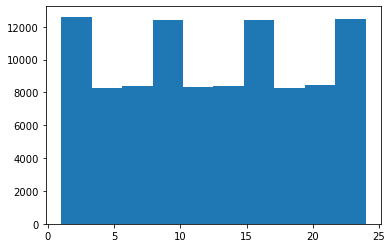

In [16]:
plt.hist(data['Subscription_Length_Months'])

In [17]:
(data['Subscription_Length_Months'] > 5).sum()

79120

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Churn'>

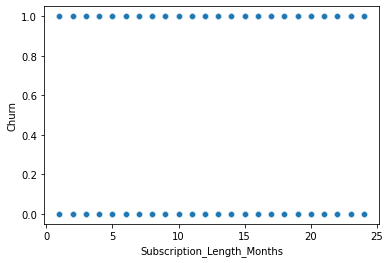

In [18]:
sns.scatterplot(x=data['Subscription_Length_Months'], y=data['Churn'], data=data)

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Churn'>

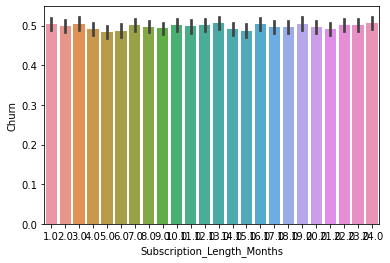

In [19]:
sns.barplot(x=data['Subscription_Length_Months'], y=data['Churn'], data=data)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Subscription_Length_Months'}>,
        <AxesSubplot:title={'center':'Monthly_Bill'}>],
       [<AxesSubplot:title={'center':'Total_Usage_GB'}>,
        <AxesSubplot:title={'center':'Churn'}>]], dtype=object)

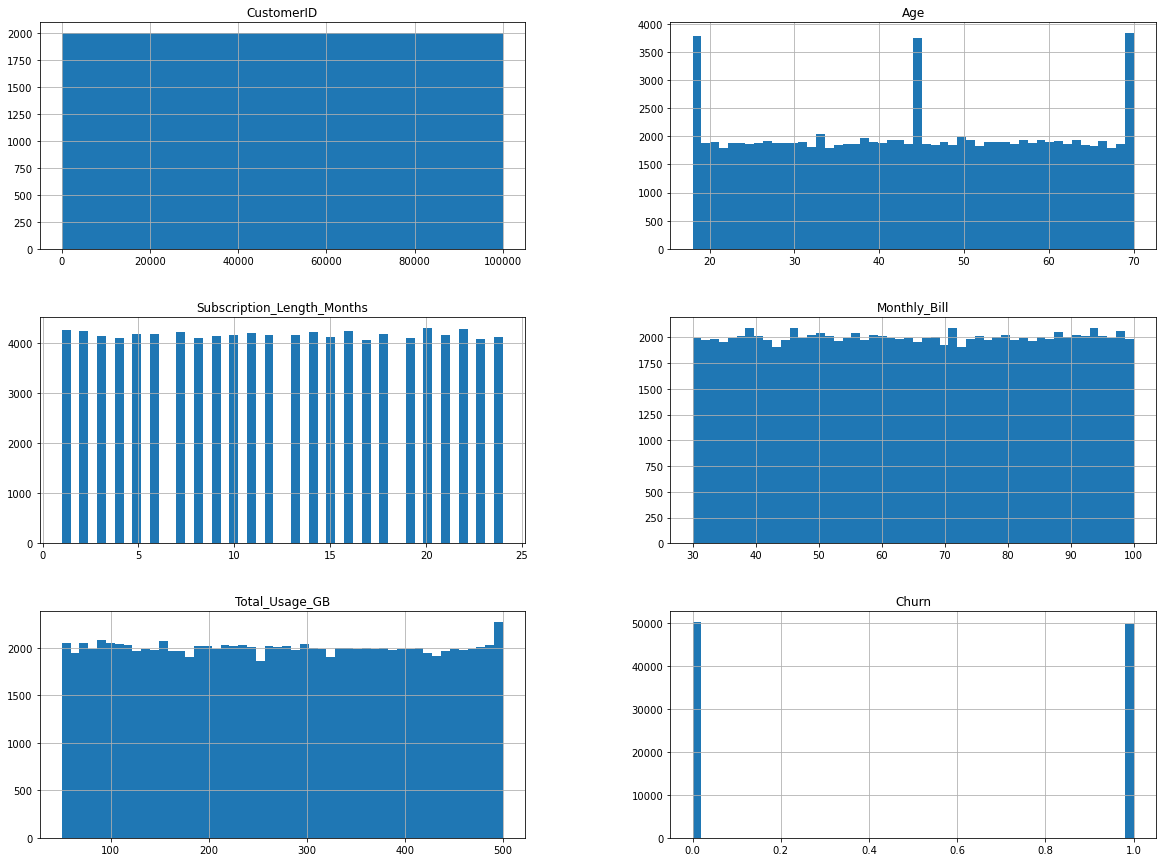

In [20]:
data.hist(bins=50,figsize=(20,15))

<AxesSubplot:xlabel='Age', ylabel='Churn'>

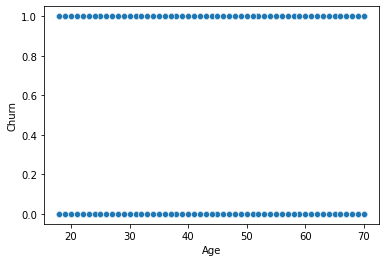

In [21]:
sns.scatterplot(x=data['Age'], y=data['Churn'], data=data)


In [22]:
data['Location'].count

<bound method Series.count of 0        Los Angeles
1           New York
2        Los Angeles
3              Miami
4              Miami
            ...     
99995        Houston
99996       New York
99997        Chicago
99998       New York
99999    Los Angeles
Name: Location, Length: 100000, dtype: object>

In [23]:
## droping the unwanted columns
data.head(2)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0


In [24]:
dr = ['Name','CustomerID','Gender','Location']

In [25]:
data = data.drop(columns=dr)


In [26]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,17.0,73.36,236.0,0.0
1,62.0,1.0,48.76,172.0,0.0
2,24.0,5.0,85.47,460.0,0.0
3,36.0,3.0,97.94,297.0,1.0
4,46.0,19.0,58.14,266.0,0.0


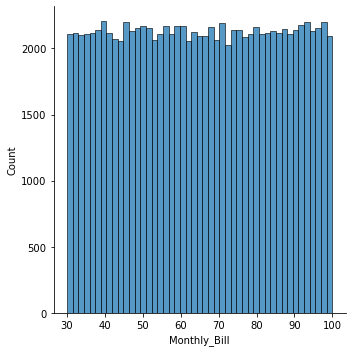

In [27]:
sns.displot(data['Monthly_Bill'])

In [28]:
data['Cost_Per_GB'] = data['Monthly_Bill'] / data['Total_Usage_GB']
data['total_cost']=data['Monthly_Bill']*data['Subscription_Length_Months']

In [29]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Cost_Per_GB,total_cost
0,63.0,17.0,73.36,236.0,0.0,0.310847,1247.12
1,62.0,1.0,48.76,172.0,0.0,0.283488,48.76
2,24.0,5.0,85.47,460.0,0.0,0.185804,427.35
3,36.0,3.0,97.94,297.0,1.0,0.329764,293.82
4,46.0,19.0,58.14,266.0,0.0,0.218571,1104.66


<AxesSubplot:xlabel='total_cost', ylabel='Churn'>

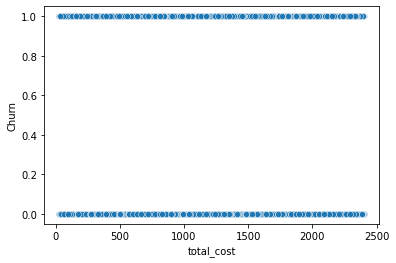

In [30]:
sns.scatterplot(x=data['total_cost'], y=data['Churn'], data=data)

<AxesSubplot:xlabel='Monthly_Bill', ylabel='Churn'>

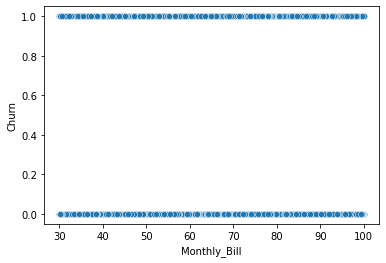

In [31]:
sns.scatterplot(x=data['Monthly_Bill'], y=data['Churn'], data=data)

In [32]:
data.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Cost_Per_GB,total_cost
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790,0.334876,811.779157
std,15.280283,6.926461,20.230696,130.463063,0.499998,0.276170,533.858809
min,18.000000,1.000000,30.000000,50.000000,0.000000,0.060180,30.060000
25%,31.000000,6.000000,47.540000,161.000000,0.000000,0.161164,378.240000
50%,44.000000,12.000000,65.010000,274.000000,0.000000,0.237485,726.340000
75%,57.000000,19.000000,82.640000,387.000000,1.000000,0.402747,1161.862500
max,70.000000,24.000000,100.000000,500.000000,1.000000,1.999200,2399.520000


In [33]:
data_copy = data.copy()

In [34]:
data_copy.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Cost_Per_GB,total_cost
0,63.0,17.0,73.36,236.0,0.0,0.310847,1247.12
1,62.0,1.0,48.76,172.0,0.0,0.283488,48.76
2,24.0,5.0,85.47,460.0,0.0,0.185804,427.35
3,36.0,3.0,97.94,297.0,1.0,0.329764,293.82
4,46.0,19.0,58.14,266.0,0.0,0.218571,1104.66


In [35]:
dr = ['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']

In [36]:
data_copy=data_copy.drop(columns=dr)

In [37]:
data_copy.head()

,Age,Churn,Cost_Per_GB,total_cost
0,63.0,0.0,0.310847,1247.12
1,62.0,0.0,0.283488,48.76
2,24.0,0.0,0.185804,427.35
3,36.0,1.0,0.329764,293.82
4,46.0,0.0,0.218571,1104.66


In [38]:
x=data_copy.drop(columns=['Churn'])
y=data_copy['Churn']

In [39]:
x

,Age,Cost_Per_GB,total_cost
0,63.0,0.310847,1247.12
1,62.0,0.283488,48.76
2,24.0,0.185804,427.35
3,36.0,0.329764,293.82
4,46.0,0.218571,1104.66
...,...,...,...
99995,33.0,0.243938,1267.99
99996,62.0,0.175641,1171.35
99997,64.0,0.382908,1633.87
99998,51.0,0.113479,985.00


In [40]:
y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
99995    1.0
99996    0.0
99997    1.0
99998    1.0
99999    1.0
Name: Churn, Length: 100000, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
x_train

,Age,Cost_Per_GB,total_cost
75220,54.0,0.412195,422.50
48955,28.0,0.343347,1969.44
44966,57.0,0.843387,627.48
13568,19.0,0.188266,618.83
92727,56.0,0.106752,268.16
...,...,...,...
6265,35.0,0.286511,1413.93
54886,56.0,0.246110,1110.20
76820,69.0,0.237508,152.48
860,55.0,0.283143,1070.28


In [44]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [45]:
accuracy_logreg

0.49575

In [46]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf_test = rf.predict(x_test)
y_pred_rf_train = rf.predict(x_train)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)

In [47]:
accuracy_rf_test

0.49665

In [48]:
accuracy_rf_train

1.0

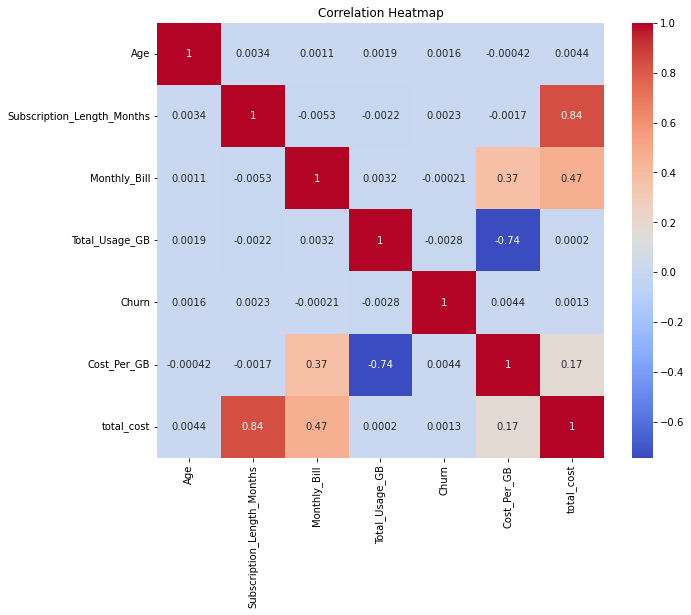

In [49]:
## checking the corelation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
## DecisionTree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)


DecisionTreeClassifier()

In [51]:

y_pred =DT.predict(x_test)
print("Test Accuracy:-",accuracy_score(y_test, y_pred)*100,"%\n")

Test Accuracy:- 49.795 %



In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)


KNeighborsClassifier()

In [56]:
y_pred = KNC.predict(x_test)

In [57]:
print("Test Accuracy:-",accuracy_score(y_test, y_pred)*100,"%\n")

Test Accuracy:- 49.34 %



In [ ]:
## I have applied the Decision Tree , KNN , Random Forest and the best is Decision Tree it's accuracy is 49.79%